In [1]:
import os 
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import processing
import importlib
sns.set_theme(context="notebook")
from matplotlib import dates as mdates
import matplotlib
import pandas as pd
matplotlib.rcParams.update({'font.size': 18,'axes.labelsize':18,'legend.fontsize':16})

Now we read the post processed files.


In [3]:
artikel_code='AHEK'
# artikel_code= 'TB80120G'
region='Rotterdam'
# region='Den Haag'
file_loc=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_forecasting\Modelling\processed_data'
file_loc=file_loc+ "/" + region
in_file=os.path.join(file_loc,artikel_code+'_ing_2010.csv')
end_file=os.path.join(file_loc,artikel_code+'_end_2010.csv')
print(in_file)
df_in=pd.read_csv(in_file,header=0,sep=',',on_bad_lines='warn')
print(df_in.keys())
df_end=pd.read_csv(end_file,header=0,sep=',',on_bad_lines='warn')
print(df_end.keys())


C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_forecasting\Modelling\processed_data/Rotterdam\AHEK_ing_2010.csv
Index(['Unnamed: 0', 'Ing_Order', 'Ing_Datum', 'Ing_Aantal'], dtype='object')
Index(['Unnamed: 0', 'End_Order', 'End_Datum', 'Ret_Aantal'], dtype='object')


Now we see for discrepancies like missing date and missing aantal
and process it correctly. Let us start with ingang

In [4]:
in_date_vec=df_in['Ing_Datum']
in_aantal_vec=df_in['Ing_Aantal']
issue_index=processing.get_issue_dates(in_date_vec)
(in_nanindex,in_aantal_vec)=processing.make_nanindex_to_zero(in_aantal_vec)
print(in_aantal_vec[in_nanindex])
end_date_vec=df_end['End_Datum']
end_aantal_vec=df_end['Ret_Aantal']
end_issue_index=processing.get_issue_dates(end_date_vec)
(end_nanindex,end_aantal_vec)=processing.make_nanindex_to_zero(end_aantal_vec)
print(end_aantal_vec[end_nanindex])

nan
24149
[  365   397  5023  5038 20375 25592 26749 33143 35134]
365      0.0
397      0.0
5023     0.0
5038     0.0
20375    0.0
25592    0.0
26749    0.0
33143    0.0
35134    0.0
Name: Ing_Aantal, dtype: float64
nan
26258
[   86   138   219   326   412   447   490   491   662   784   920   921
  1143  1145  1172  1283  1303  1604  1859  1870  1966  1967  1981  1982
  1993  2008  2098  2103  2385  2402  2497  2654  2705  2748  2934  2985
  3212  3234  3340  3429  3491  3713  3737  4134  4162  4657  4659  4698
  4756  4898  4934  4942  5264  5302  5340  5748  5757  5782  5805  5829
  5905  6297  7103  7238  7322  7517  7571  7718  7821  7942  8051  8113
  8212  8313  8335  8537  8544  8627  8660  8783  8803  9329  9770  9771
  9772 10150 10312 10450 11008 11124 11543 11737 12194 12946 12979 13016
 13035 13162 13252 13316 13366 13565 14099 14411 14412 14441 14442 14607
 15019 15032 15397 15457 15482 15493 15786 16251 16459 16626 16901 17013
 17243 17258 17557 17565 17839 18028 18123 1

Now we play around with plotting and analysis.


In [5]:
def compute_monthly_net_article(month,year,indate_vec,enddate_vec,aantal_retour_vec,aantal_vec):
    net_art=0
    for i in range(len(indate_vec)):
        indate=indate_vec.values[i]
        # print()
        if type(indate)==str:
            month_indate=processing.get_month_from_datestr(indate)
            year_indate=processing.get_year_from_datestr(indate)
            if (month_indate==month) & (year_indate==year):
            # print(i)
                net_art+=aantal_vec.values[i]
        # else:
        #     print(indate)
    for i in range(len(enddate_vec)):    
        enddate=enddate_vec.values[i]
        if type(enddate)==str:
            month_enddate=processing.get_month_from_datestr(enddate)     
            year_enddate=processing.get_year_from_datestr(enddate)   
            if (month_enddate==month) & (year_indate==year):
                net_art+=(-aantal_retour_vec.values[i])
    return(net_art)



In [7]:
#getting a time series of a year long data for each month based on 
year_time_series=pd.date_range(start="01-01-2010",end="01-01-2022",freq='M')
net_art_month_year_vec=[]
for year in year_time_series.year[0::12]:
    print(year)
    for month in year_time_series.month[:12]:
        # print(month)
        net_art_month=compute_monthly_net_article(month,year,in_date_vec,end_date_vec,end_aantal_vec,in_aantal_vec)
        net_art_month_year_vec=np.append(net_art_month_year_vec,net_art_month)

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [9]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%B')
yearsFmt = mdates.DateFormatter('%Y')

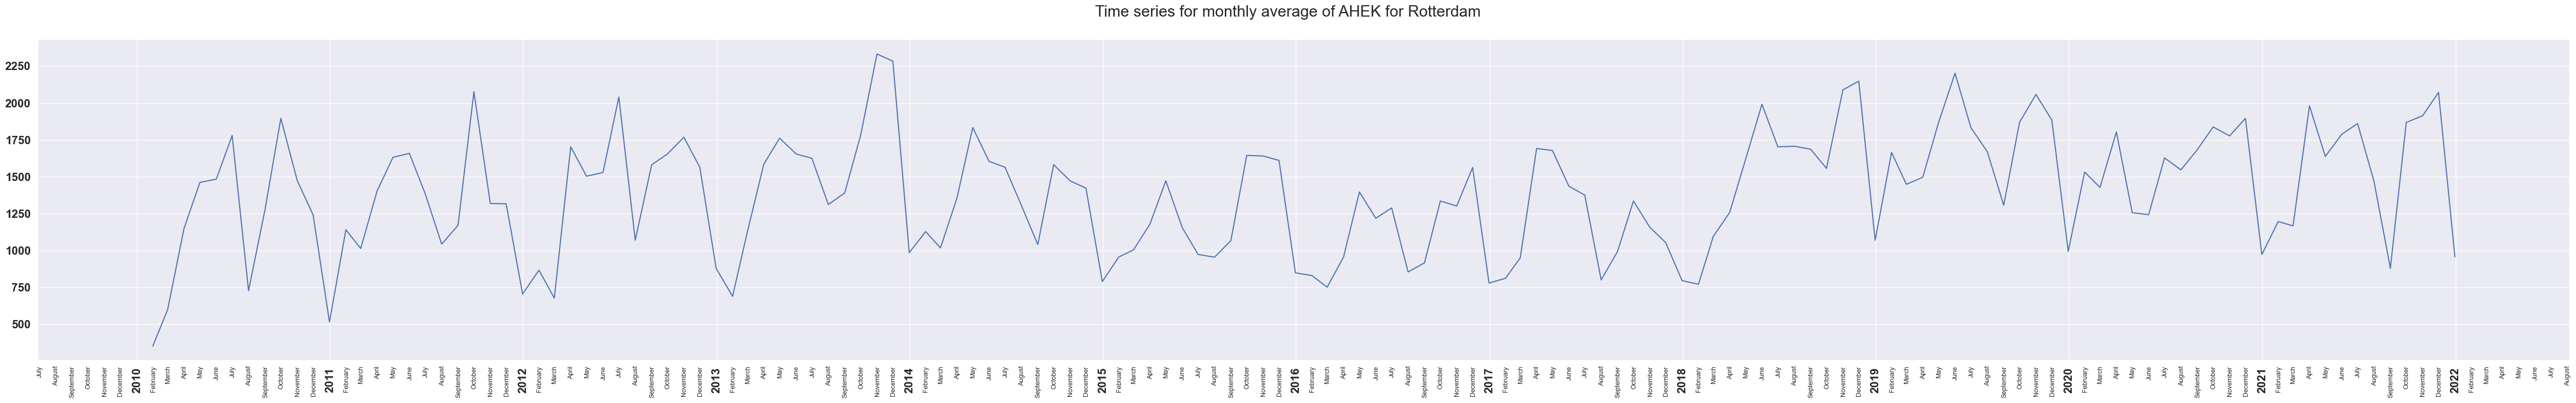

In [23]:
results_fileloc=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_forecasting\Results'+"/"+region
file=os.path.join(results_fileloc,artikel_code+'_test.jpg')
plt.rcParams["figure.figsize"] = [30, 8]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(1, 1, figsize=(50, 8))
ax.plot(year_time_series,net_art_month_year_vec)
plt.rcParams['date.converter'] = 'concise'
plt.rcParams['font.size']=18
# setting font sizeto 30
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
# ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=12, maxticks=20))
ax.tick_params(axis='both',labelsize=16)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90,fontsize=9)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90,fontweight='bold')
plt.tight_layout()
plt.yticks(fontweight='bold')
fig.suptitle('Time series for monthly average of '+artikel_code+' for '+region)
fig.savefig(file,dpi=400)

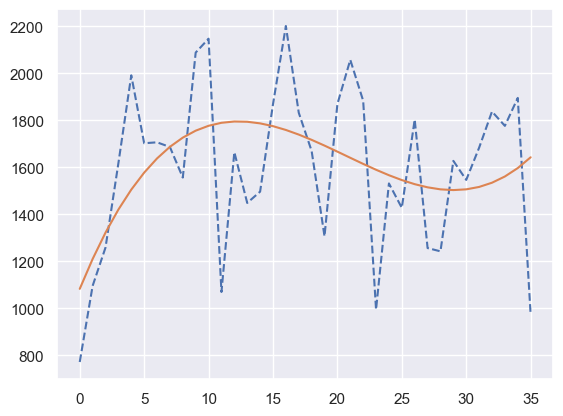

In [154]:
#data from 2018-2020
X_test_data=np.arange(len(year_time_series[36:72])).reshape(1,-1)
test_data=net_art_month_year_vec[36:72]
# plt.plot(X_test_data.ravel(),test_data)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X_test_data.T)
poly_reg.fit(X_poly,test_data)
lin_reg=LinearRegression()
lin_reg.fit(X_poly,test_data)
plt.plot(X_test_data.ravel(),test_data,'--')
plt.plot(X_test_data.ravel(),lin_reg.predict(poly_reg.fit_transform(X_test_data.T)))

Get monthly time series for the years.

In [ ]:

results_fileloc=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_forecasting\Results'+'/'+ region
file=os.path.join(results_fileloc,artikel_code+'_month_distribution.jpg')
month_name_vec=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig=plt.figure(figsize=(30, 30))
for i in range(12):
    ax=fig.add_subplot(4,3,i+1)
    month_series=net_art_month_year_vec[i::12]
    ax.plot(year_time_series.year[0::12],month_series)
    ax.set_title(month_name_vec[i])
plt.rcParams['date.converter'] = 'concise'
plt.rcParams['font.size']=18
# setting font sizeto 30

# ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=12, maxticks=20))
# ax.tick_params(axis='both',labelsize=16)
fig.suptitle('Monthly distribution over the year of '+artikel_code+' for '+region,fontsize=24)
plt.tight_layout()
fig.savefig(file)

Let us try a weekly plot.

In [45]:
def compute_weekly_net_article(week,year,indate_vec,enddate_vec,aantal_retour_vec,aantal_vec):
    net_art=0
    for i in range(len(indate_vec)):
        indate=indate_vec.values[i]
        # print()
        if type(indate)==str:
            week_indate=processing.get_week_from_datestr(indate)
            year_indate=processing.get_year_from_datestr(indate)
            if (week_indate==week) & (year_indate==year):
            # print(i)
                net_art+=aantal_vec.values[i]
        # else:
        #     print(indate)
    for i in range(len(enddate_vec)):    
        enddate=enddate_vec.values[i]
        if type(enddate)==str:
            week_enddate=processing.get_week_from_datestr(enddate)     
            year_enddate=processing.get_year_from_datestr(enddate)   
            if (week_enddate==week) & (year_indate==year):
                net_art+=(-aantal_retour_vec.values[i])
    return(net_art)


In [92]:
#getting a time series of a year long data for each month based on 
year_weekly_time_series=pd.date_range(start="01-01-2015",end="01-01-2022",freq='W')
net_art_week_year_vec=[]
weekvec=np.arange(0,53)+1
for year in year_weekly_time_series.year[0::53]:
    print(year)
    for week in weekvec:      
        #removing issue with leap year
        if (year==2015) or (year==2020):
            print(week)
            net_art_week=compute_weekly_net_article(week,year,in_date_vec,end_date_vec,end_aantal_vec,in_aantal_vec)
            net_art_week_year_vec=np.append(net_art_week_year_vec,net_art_week)
        else:
            if week==53:
                continue
            else:
                print(week)
                net_art_week=compute_weekly_net_article(week,year,in_date_vec,end_date_vec,end_aantal_vec,in_aantal_vec)
                net_art_week_year_vec=np.append(net_art_week_year_vec,net_art_week)

2015
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
2016
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
2017
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
2018
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
2019
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
2020
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
2021
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29

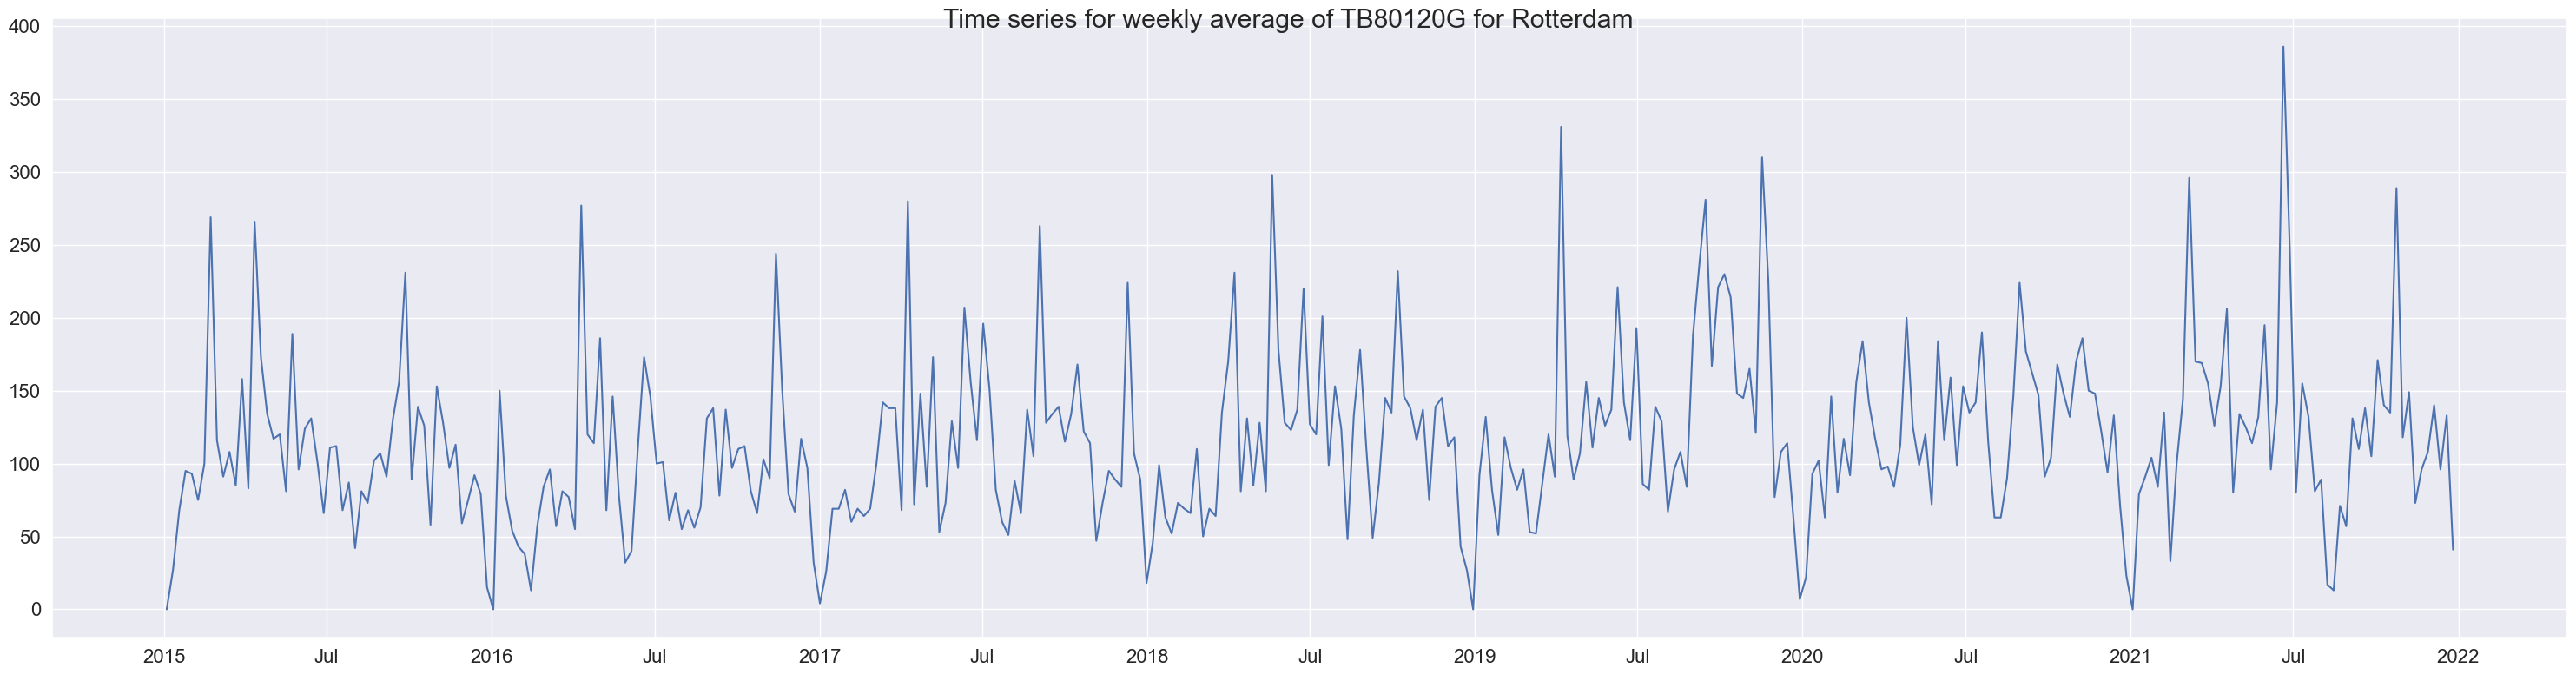

In [93]:
results_fileloc=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_forecasting\Results'+"/"+region
file=os.path.join(results_fileloc,artikel_code+'_weekly.jpg')

fig,ax=plt.subplots(1, 1, figsize=(30, 8))
ax.plot(year_weekly_time_series[:],net_art_week_year_vec[:-1])
plt.rcParams['date.converter'] = 'concise'
plt.rcParams['font.size']=18
# setting font sizeto 30

ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=12, maxticks=20))
ax.tick_params(axis='both',labelsize=16)
plt.tight_layout()
fig.suptitle('Time series for weekly average of '+artikel_code+' for '+region)
fig.savefig(file)

Testing polynomial regression,.



ValueError: x and y must have same first dimension, but have shapes (1, 156) and (156,)

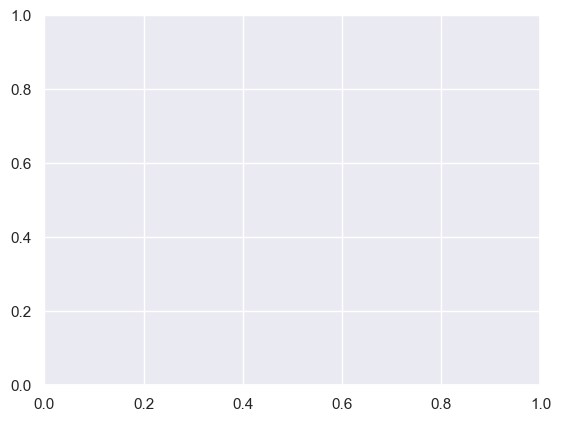

In [107]:
#data from 2018-2020
X_test_data=np.arange(len(year_weekly_time_series[157:313])).reshape(1,-1)
test_data=net_art_week_year_vec[157:313]
plt.plot(X_test_data,test_data)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X_test_data.T)
poly_reg.fit(X_poly,test_data)
lin_reg=LinearRegression()
lin_reg.fit(X_poly,test_data)
plt.plot(X_test_data.ravel(),test_data,'--')
plt.plot(X_test_data.ravel(),lin_reg.predict(poly_reg.fit_transform(X_test_data.T)))

LinearRegression()

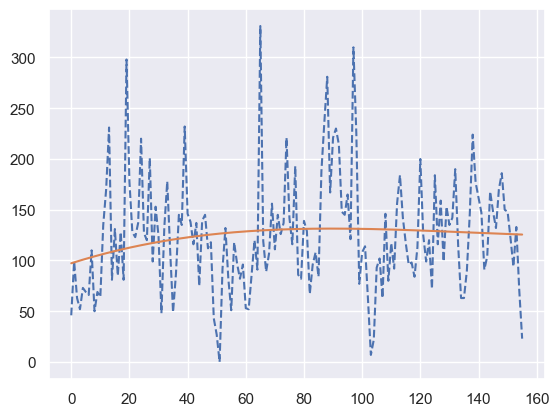

In [3]:
#definining initial parameters
fileloc='../../Raw_data_van_Tim/BISAS Data Ruw/'
regionvec=['Rotterdam']
vestig_vec=[3,6,9,8,4,7,1,5]
for i in range(len(regionvec)):
        # region='Rotterdam'
    region=regionvec[i]
      #rotterdam code is 3 
    # vestiging_code=3
    vestiging_code=vestig_vec[i]
    proc_data_path=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_forecasting\Modelling\processed_data'
    start_year=2019
    end_year=2020
    ##Reading order file for vestiging/region order numbers and getting only order numbers within that region
    #and within the above date range.
    order_file=fileloc+'order_edited.csv'
    reg_order_series,vestiging_series=processing.get_order_numbers(order_file,vestiging_code,start_year,end_year)

In [6]:
reg_order_series[:10]

137403    443909
157625    465702
157626    465703
157629    465706
157633    465711
157666    465745
157669    465748
157671    465750
157672    465751
157676    465755
Name: Order, dtype: object

In [7]:
import test_process

In [8]:
test_process.get_in_out(reg_order_series[:10])

Order reading for vestiging and date done.
Done reading bestel and retour
Csv file created
Time required is: 18.415868997573853
Done reading bestel and retour
Csv file created
Time required is: 16.39000701904297
Done reading bestel and retour
Csv file created
Time required is: 13.675198793411255


Testing for extra artikels


In [2]:
import os 
import sys
import numpy as np
import pandas as pd
import processing
import time
# import importlib
import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm



In [2]:



#definining initial parameters
fileloc='../../Raw_data_van_Tim/BISAS Data Ruw/'
regionvec=['Rotterdam','Den Haag', 'Amsterdam', 'Assen', 'Utrecht', 'Eindhoven', 'Beverwijk', 'Zwolle']
vestig_vec=[3,6,9,8,4,7,1,5]
region='Assen'
# num_cores = multiprocessing.cpu_count()


vestiging_code=8
vestig_region={'3':'Rotterdam','6':'Den Haag','9':'Amsterdam','8': 'Assen','4':'Utrecht','7': 'Eindhoven','1': 'Beverwijk', '5':'Zwolle'}
# for i in range(len(regionvec)):
        # region='Rotterdam'
region=vestig_region[str(vestiging_code)]   
    #rotterdam code is 3 
# vestiging_code=3
# vestiging_code=vestig_vec[i]
proc_data_path=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_Forecasting\Modelling\processed_data'
os.makedirs(proc_data_path+'/'+region, exist_ok=True)
start_year=2010
end_year=2022
##Reading order file for vestiging/region order numbers and getting only order numbers within that region
#and within the above date range.
order_file=fileloc+'order_edited.csv'

reg_order_series,vestiging_series=processing.get_order_numbers(order_file,vestiging_code,start_year,end_year)
print('Order reading for vestiging and date done.' )
# artikel_code_vec=['AHEK','J16-90','PB6090','TB80120G','A01-80-(30)']
# artikel_code_vec=['C02-80']
# artikel_code_vec=['PB6090']
artikel_code='AHEK'
# for artikel_code in artikel_code_vec:
#     st=time.time()
#     ### now reading the two files belwo to get the indate and end date along with aantal huur and aantal retour.
#     orderfile=fileloc+'bestel_processed.csv'
#     bon='bestel'
#     indate_vec,aantal_vec,in_order_vec=processing.get_date_art_number(orderfile,reg_order_series,artikel_code,bon)
#     orderfile=fileloc+'retour_processed.csv'
#     bon='retour'
#     enddate_vec,aantal_retour_vec,end_order_vec=processing.get_date_art_number(orderfile,reg_order_series,artikel_code,bon)
#     print('Done reading bestel and retour')
#     ### saving in a csv formate.
#     ### saving in a csv formate.  
#     #two files with in and end order.
#     data_dict_in={'Ing_Order':in_order_vec,'Ing_Datum':indate_vec,'Ing_Aantal':aantal_vec}
#     data_dict_end={'End_Order':end_order_vec,'End_Datum':enddate_vec,'Ret_Aantal':aantal_retour_vec}
#     df_processed_in=pd.DataFrame.from_dict(data_dict_in)
#     file=os.path.join(proc_data_path,region,artikel_code+'_ing_'+str(start_year)+'.csv')
#     df_processed_in.to_csv(file)
#     df_processed_end=pd.DataFrame.from_dict(data_dict_end)
#     file=os.path.join(proc_data_path,region,artikel_code+'_end_'+str(start_year)+'.csv')
#     df_processed_end.to_csv(file)
#     print('Csv file created')
#     et=time.time()
#     print('Time required is: '+str(et-st) )

        

Order reading for vestiging and date done.


In [85]:
# artikel_code_vec=['PB6090']
artikel_code='AHEK'
# for artikel_code in artikel_code_vec:
# artikel_code='C02-80'
st=time.time()
### now reading the two files belwo to get the indate and end date along with aantal huur and aantal retour.
orderfile=fileloc+'bestel_processed.csv'
bon='bestel'

df_alldata=pd.read_csv(orderfile,header=0,sep=',',on_bad_lines='warn')
df_alldata.head()
#gettting indices with the type of artikel.
artikel_all_series=df_alldata['Artikel']
artikel_index=artikel_all_series[artikel_all_series.values==artikel_code].index
order_series_artikel=df_alldata['Order'][artikel_index]
order_series_artikel=order_series_artikel.astype('int')
order_series_artikel=order_series_artikel.astype('object')
# common_index=processing.get_common_index(order_series_artikel,reg_order_series)
# if bon=='bestel':
#     date_vec=df_alldata['Ingangdatum huur'][common_index]
#     aantal_vec=df_alldata['Aantal'][common_index]
#     net_order_vec=df_alldata['Order'][common_index]
# else:
#     date_vec=df_alldata['Einddatum huur'][common_index]
#     aantal_vec=df_alldata['Aantal Retour'][common_index]
#     net_order_vec=df_alldata['Order'][common_index]
# indate_vec,aantal_vec,in_order_vec=processing.get_date_art_number(orderfile,reg_order_series,artikel_code,bon)


In [86]:
df1=pd.DataFrame(order_series_artikel)
common_index=[]
for elem in reg_order_series:
    # print(elem)
    indi=df1[df1['Order']==int(elem)].index
    # if len(indi)!=0:
    #     # print(indi)
    common_index=np.append(common_index,indi)

In [87]:
for elem in reg_order_series:
    if elem==str(415259):
        print(elem)
    # df1['Order']

415259


In [88]:
np.where(reg_order_series=='415259')

(array([763], dtype=int64),)

In [80]:
reg_order_series.values[786]
importlib.reload(processing)

<module 'processing' from 'c:\\Users\\Amey.RISE3D\\OneDrive - RISE3D\\Documents\\BUKO_FORECASTING\\Modelling\\model\\processing.py'>

In [81]:
# df_order=pd.read_csv(order_file,skip_blank_lines=True,header=0,encoding='ascii',encoding_errors='backslashreplace',sep=';',on_bad_lines='skip')
df_order=pd.read_csv(order_file,header=0,sep=';',on_bad_lines='warn')
vestiging_series=pd.Series(df_order['Vestiging'])
order_series=pd.Series(df_order['Code'])
order_date_series=pd.Series(df_order['Datum'])
region_code=8
#getting index of region code and the order numbers corresponding to hat.
reg_index=vestiging_series[vestiging_series==region_code].index
order_series=order_series[reg_index]
vestiging_series=vestiging_series[reg_index]
order_date_series=order_date_series[reg_index]
# #date.
# # start_year=2015
# # end_year=2016
date_ind=processing.get_date_ind(order_date_series,start_year,end_year)
order_series=order_series[date_ind]
# vestiging_series=vestiging_series[date_ind]
# order_series=order_series.rename('Order')

In [82]:
order_series

102390    406483
102439    406533
102448    406543
102473    406569
102495    406591
           ...  
202266    513523
202355    513631
202359    513636
203083    514397
212888    524709
Name: Code, Length: 7071, dtype: object

In [51]:
order_series.index[786]

110654

In [57]:
print(order_date_series.values[order_date_series.index==110654])

['13/06/2017']


In [34]:
import importlib
importlib.reload(processing)

<module 'processing' from '/home/amey/Projects/BUKO_Forecasting/Modelling/model/processing.py'>

In [36]:
#!/bin/sh

import os 
import sys
import numpy as np
import pandas as pd
import processing
import time
# import importlib
import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm

#definining initial parameters
fileloc='../../Raw_data_van_Tim/BISAS Data Ruw/'
# regionvec=['Rotterdam','Den Haag', 'Amsterdam', 'Assen', 'Utrecht', 'Eindhoven', 'Beverwijk', 'Zwolle']
regionvec=['Rotterdam']
vestig_vec=[3,6,9,8,4,7,1,5]

i=0
# for i in range(len(regionvec)):
    # region='Rotterdam'
region=regionvec[i]
  #rotterdam code is 3 
# vestiging_code=3
vestiging_code=vestig_vec[i]
dirname=os.path.dirname(os.getcwd())

start_year=2010
end_year=2022
##Reading order file for vestiging/region order numbers and getting only order numbers within that region
#and within the above date range.

# artikel_code_vec=['AHEK','J16-90','PB6090','TB80120G','A01-80-(30)']
# artikel_code_vec=['TB80120G','A01-80-(30)','C02-80']
artikel_code_vec=['C02-80','AHEK']


In [65]:
artikel_code='C02-80'
    # artikel_code='AHEK'

order_file=fileloc+'order_edited.csv'

reg_order_series,vestiging_series=processing.get_order_numbers(order_file,vestiging_code,start_year,end_year)
print('Order reading for vestiging and date done.' )
# for artikel_code in artikel_code_vec:

reg_order_series=reg_order_series.values.astype(int)

Order reading for vestiging and date done.


In [38]:
st=time.time()
proc_data_path=os.path.join(dirname,'processed_data')
### now reading the two files belwo to get the indate and end date along with aantal huur and aantal retour.
orderfile=fileloc+'bestel_processed.csv'
bon='bestel'
# indate_vec,aantal_vec,in_order_vec=processing.get_date_art_number(orderfile,reg_order_series,artikel_code,bon)
# orderfile=fileloc+'retour_processed.csv'
# bon='retour'
# enddate_vec,aantal_retour_vec,end_order_vec=processing.get_date_art_number(orderfile,reg_order_series,artikel_code,bon)
# print('Done reading bestel and retour')
# ### saving in a csv formate.
# ### saving in a csv formate.  
# #two files with in and end order.
# data_dict_in={'Ing_Order':in_order_vec,'Ing_Datum':indate_vec,'Ing_Aantal':aantal_vec}
# data_dict_end={'End_Order':end_order_vec,'End_Datum':enddate_vec,'Ret_Aantal':aantal_retour_vec}
# df_processed_in=pd.DataFrame.from_dict(data_dict_in)
# file=os.path.join(proc_data_path,region,artikel_code+'_ing_'+str(start_year)+'.csv')
# df_processed_in.to_csv(file)
# df_processed_end=pd.DataFrame.from_dict(data_dict_end)
# file=os.path.join(proc_data_path,region,artikel_code+'_end_'+str(start_year)+'.csv')
# df_processed_end.to_csv(file)
# print('Csv file created')
# print('file saved at:'+file)
# et=time.time()
# print('Time required is: '+str(et-st) )

In [85]:
def get_common_index(reg_order_series,order_series_artikel):
    intersect=pd.Series(list(set(order_series_artikel.values).intersection(set(reg_order_series))))
    intersect=intersect.rename('Order')
    ind=[]
    for elem in intersect:
        indi=order_series_artikel[order_series_artikel==elem].index
        ind=np.append(ind,indi)
    return(ind)

In [88]:
def get_date_art_number(orderfile,reg_order_series,artikel_code,bon,start_year,end_year):
    df_alldata=pd.read_csv(orderfile,header=0,sep=',',on_bad_lines='warn')
    df_alldata.head()
    #gettting indices with the type of artikel.
    artikel_all_series=df_alldata['Artikel']
    artikel_index=artikel_all_series[artikel_all_series.values==artikel_code].index
    order_series_artikel=df_alldata['Order'][artikel_index]
    order_series_artikel=order_series_artikel.astype('int')
    order_series_artikel=order_series_artikel.astype('object')
    if bon=='bestel':
        order_series_date=df_alldata['Ingangdatum huur'][artikel_index]
        aantal_vec=df_alldata['Aantal'][artikel_index]
        date_ind=processing.get_date_ind(order_series_date,start_year,end_year)
        order_series_artikel=order_series_artikel[date_ind]
        order_series_date=order_series_date[date_ind]
        aantal_vec=aantal_vec[date_ind]
        common_index=get_common_index(reg_order_series,order_series_artikel)
        order_series_date=order_series_date[common_index]
        aantal_vec=aantal_vec[common_index]
        net_order_series=order_series_artikel[common_index]

        # aantal_manco_vec=np.array(df_alldata[df_alldata.columns[7]][artikel_index])
        # # aantal_manco_vec=np.where(np.isnan(aantal_manco_vec)==True,0,aantal_manco_vec)
        # for i in  range(len(aantal_manco_vec)):
        #     aantal_manco_vec[i] = aantal_manco_vec[i].replace(' ', '')
    else:
        order_series_date=df_alldata['Einddatum huur'][artikel_index]
        aantal_vec=df_alldata['Aantal Retour'][artikel_index]
        date_ind=processing.get_date_ind(order_series_date,start_year,end_year)
        order_series_artikel=order_series_artikel[date_ind]
        order_series_date=order_series_date[date_ind]
        aantal_vec=aantal_vec[date_ind]
        common_index=get_common_index(reg_order_series,order_series_artikel)
        order_series_date=order_series_date[common_index]
        aantal_vec=aantal_vec[common_index]
        net_order_series=order_series_artikel[common_index]
        
    return(order_series_date,aantal_vec,net_order_series)

In [89]:
net_order_series

2586660    491520
265409     327686
316324     327686
1466392    417799
1449876    417799
            ...  
947435     376811
1925498    450539
2586589    491502
2788304    491502
2180716    466932
Name: Order, Length: 1890, dtype: object

In [21]:
# for i in  range(len(aantal_manco_vec)):
#   aantal_manco_vec[i] = aantal_manco_vec[i].replace(' ', '')
  
#   aantal_manco_vec[i]=float(aantal_manco_vec)

In [69]:

aantal_vec=df_alldata['Aantal'][date_ind]
# net_order_vec=df_alldata['Order'][artikel_index]
# vestiging_series=vestiging_series[date_ind]
# common_index=processing.get_common_index(order_series_artikel,reg_order_series)

In [82]:
order_series_artikel[ind]

2586660    491520
265409     327686
316324     327686
1466392    417799
1449876    417799
            ...  
947435     376811
1925498    450539
2586589    491502
2788304    491502
2180716    466932
Name: Order, Length: 1890, dtype: object

In [57]:
reg_order_series.values[a]

array(['325787'], dtype=object)

In [58]:
order_series_artikel.values

array([325787, 328496, 328582, ..., 524681, 523518, 521792], dtype=object)

In [ ]:
reg_order_series

In [73]:
df_alldata=pd.read_csv(orderfile,header=0,sep=',',on_bad_lines='warn')
df_alldata.head()
#gettting indices with the type of artikel.
artikel_all_series=df_alldata['Artikel']
artikel_index=artikel_all_series[artikel_all_series.values==artikel_code].index
order_series_artikel=df_alldata['Order'][artikel_index]
order_series_artikel=order_series_artikel.astype('int')
order_series_artikel=order_series_artikel.astype('object')
    if bon=='bestel':
        order_series_date=df_alldata['Ingangdatum huur']
        ##dates 
        #update 23_11 remove date issue
    # start_year=2015
    # end_year=2016
        date_ind=get_date_ind(order_series_date,start_year,end_year)
        order_series_artikel=order_series_artikel[date_ind]
    # vestiging_series=vestiging_series[date_ind]
        common_index=get_common_index(order_series_artikel,reg_order_series)

        date_vec=df_alldata['Ingangdatum huur'][common_index]
        aantal_vec=df_alldata['Aantal'][common_index]
        net_order_vec=df_alldata['Order'][common_index]
        aantal_manco_vec=df_alldata['Aantal manco'][common_index]+df_alldata['Aantal schade'][common_index]
    else:
        order_series_date=df_alldata['Einddatum huur']
        ##dates 
        #update 23_11 remove date issue
    # start_year=2015
    # end_year=2016
        date_ind=get_date_ind(order_series_date,start_year,end_year)
        order_series_artikel=order_series_artikel[date_ind]
    # vestiging_series=vestiging_series[date_ind]
        common_index=get_common_index(order_series_artikel,reg_order_series)
        date_vec=df_alldata['Einddatum huur'][common_index]
        aantal_vec=df_alldata['Aantal Retour'][common_index]
        aantal_manco_vec=df_alldata['Aantal manco'][common_index]+df_alldata['Aantal schade'][common_index]
        net_order_vec=df_alldata['Order'][common_index]

array([102390., 102439., 102448., ..., 202359., 203083., 212888.])

In [74]:
test1=pd.Series.drop_duplicates(order_series)